<a href="https://colab.research.google.com/github/sc7-cloud/TFG---GOOGLE-COLAB-C-DIGOS-/blob/main/MODELO_DE_PREDICCI%C3%93N_DE_ARTISTAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cantidad de outliers por columna:
Me gusta en TikTok                     0
Tasa de Participación en TikTok       44
Publicaciones de TikTok               33
Vistas en TikTok                      30
Seguidores en Spotify                 10
Oyentes mensuales en Spotify          26
Tasa de conversión en Spotify         17
Alcance de playlists en Spotify       22
Conteo de las playlists en Spotify    29
dtype: int64


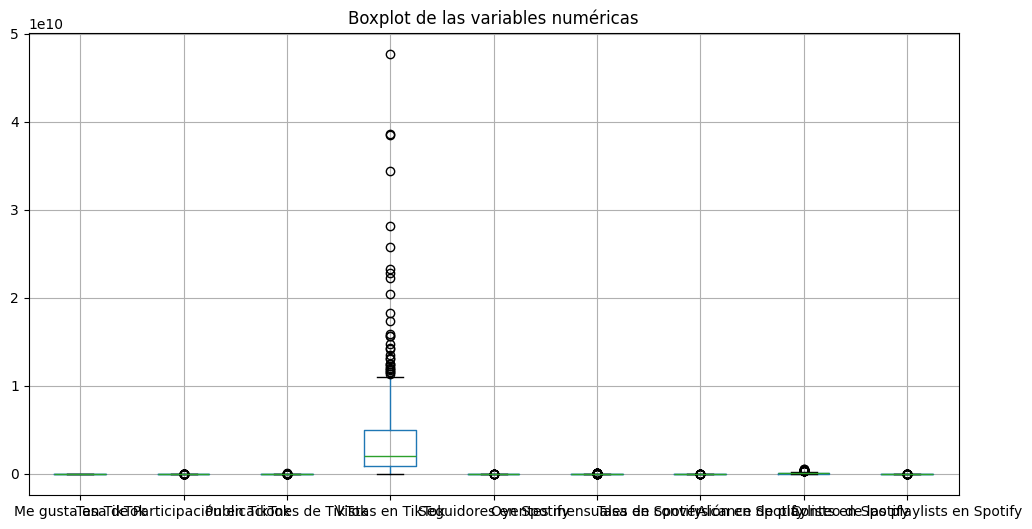

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_excel('/content/Artistas.xlsx')


numerical_columns = ['Me gusta en TikTok', 'Tasa de Participación en TikTok', 'Publicaciones de TikTok',
                     'Vistas en TikTok', 'Seguidores en Spotify', 'Oyentes mensuales en Spotify',
                     'Tasa de conversión en Spotify', 'Alcance de playlists en Spotify',
                     'Conteo de las playlists en Spotify']

df_numeric = df[numerical_columns]

Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

outliers = (df_numeric < lower_limit) | (df_numeric > upper_limit)

outliers_count = outliers.sum()
print(f"Cantidad de outliers por columna:\n{outliers_count}")

plt.figure(figsize=(12, 6))
df_numeric.boxplot()
plt.title('Boxplot de las variables numéricas')
plt.show()


In [ ]:

outliers_artistas = df[outliers.any(axis=1)]

outliers_artistas[['Artista'] + numerical_columns]

,Artista,Me gusta en TikTok,Tasa de Participación en TikTok,Publicaciones de TikTok,Vistas en TikTok,Seguidores en Spotify,Oyentes mensuales en Spotify,Tasa de conversión en Spotify,Alcance de playlists en Spotify,Conteo de las playlists en Spotify
0,Lola Young,24500000,14.0039,1791162,953728995,704502,42896849,0.016423,236722098,102843
1,Playboi Carti,3400000,77.2727,5734848,14140577425,13020064,52843480,0.246389,421788819,1144885
2,Akon,16100000,0.3473,8900121,8584715751,5355925,31490006,0.170083,314037650,1394301
3,Ellie Goulding,16100000,8.2922,5587571,11022424117,12859303,41343279,0.311037,442907117,1120085
4,GIVĒON,20200000,111.0321,5326599,10886236261,4321836,29445103,0.146776,267477001,810354
...,...,...,...,...,...,...,...,...,...,...
375,Ayo & Teo,20000000,1.2108,10851672,3117528957,973982,1769822,0.550328,19634592,141839
377,CL,6100000,3.4856,487265,2034144656,1226915,795611,1.542104,13462653,93275
383,Yeng Constantino,19800000,0.1543,2104286,815292871,2645717,1347275,1.963754,10389374,19282
385,Lil Xan,12000000,0.5690,280387,215910821,2336804,1425938,1.638784,21341295,163881


In [ ]:
import pandas as pd




Q1_tiktok = df['Vistas en TikTok'].quantile(0.25)
Q3_tiktok = df['Vistas en TikTok'].quantile(0.75)

Q1_spotify_followers = df['Seguidores en Spotify'].quantile(0.25)
Q2_spotify_oyentes = df['Oyentes mensuales en Spotify'].quantile(0.50)


df_filtered = df[(df['Vistas en TikTok'] > Q3_tiktok) &
                 (df['Seguidores en Spotify'] > Q1_spotify_followers) &
                 (df['Oyentes mensuales en Spotify'] > Q2_spotify_oyentes)]

df_filtered[['Artista', 'Vistas en TikTok', 'Seguidores en Spotify', 'Oyentes mensuales en Spotify']]


,Artista,Vistas en TikTok,Seguidores en Spotify,Oyentes mensuales en Spotify
1,Playboi Carti,14140577425,13020064,52843480
2,Akon,8584715751,5355925,31490006
3,Ellie Goulding,11022424117,12859303,41343279
4,GIVĒON,10886236261,4321836,29445103
5,Elton John,5158032468,14387519,48274557
...,...,...,...,...
212,Bazzi,14732772979,5482799,8989970
220,NIKI,11314256795,5338374,11944265
228,L7NNON,6099015184,4597454,9749741
234,Simple Plan,8053374628,3750279,7457085


from matplotlib import pyplot as plt
_df_0['Vistas en TikTok'].plot(kind='hist', bins=20, title='Vistas en TikTok')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Seguidores en Spotify'].plot(kind='hist', bins=20, title='Seguidores en Spotify')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Oyentes mensuales en Spotify'].plot(kind='hist', bins=20, title='Oyentes mensuales en Spotify')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='Vistas en TikTok', y='Seguidores en Spotify', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Seguidores en Spotify', y='Oyentes mensuales en Spotify', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['Vistas en TikTok'].plot(kind='line', figsize=(8, 4), title='Vistas en TikTok')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['Seguidores en Spotify'].plot(kind='line', figsize=(8, 4), title='Seguidores en Spotify')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['Oyentes mensuales en Spotify'].plot(kind='line', figsize=(8, 4), title='Oyentes mensuales en Spotify')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
import pandas as pd




Q1_tiktok = df['Vistas en TikTok'].quantile(0.25)
Q3_tiktok = df['Vistas en TikTok'].quantile(0.75)

Q1_spotify_followers = df['Seguidores en Spotify'].quantile(0.25)
Q2_spotify_oyentes = df['Oyentes mensuales en Spotify'].quantile(0.50)


df_filtered = df[(df['Vistas en TikTok'] > Q3_tiktok) &
                 (df['Seguidores en Spotify'] > Q1_spotify_followers) &
                 (df['Oyentes mensuales en Spotify'] > Q2_spotify_oyentes)]

count_filtered_artists = df_filtered.shape[0]


print(f"Cantidad de artistas que cumplen con las condiciones: {count_filtered_artists}")


Cantidad de artistas que cumplen con las condiciones: 80


In [ ]:
import pandas as pd



Q1_tiktok = df['Vistas en TikTok'].quantile(0.25)
Q3_tiktok = df['Vistas en TikTok'].quantile(0.75)

Q1_spotify_followers = df['Seguidores en Spotify'].quantile(0.25)
Q2_spotify_oyentes = df['Oyentes mensuales en Spotify'].quantile(0.50)


df_filtered = df[(df['Vistas en TikTok'] > Q3_tiktok) &
                 (df['Seguidores en Spotify'] > Q1_spotify_followers) &
                 (df['Oyentes mensuales en Spotify'] > Q2_spotify_oyentes)]


df_remaining = df.drop(df_filtered.index)


print(f"Cantidad de artistas eliminados: {df_filtered.shape[0]}")
print(f"Cantidad de artistas restantes: {df_remaining.shape[0]}")


Cantidad de artistas eliminados: 80
Cantidad de artistas restantes: 322


Matriz de Correlación:
                                Seguidores en TikTok  Me gusta en TikTok  \
Seguidores en TikTok                       1.000000            0.427179   
Me gusta en TikTok                         0.427179            1.000000   
Publicaciones de TikTok                    0.137576            0.019136   
Vistas en TikTok                           0.115272            0.025050   
Seguidores en Spotify                      0.229821           -0.031671   
Oyentes mensuales en Spotify               0.130832            0.107759   
Tasa de conversión en Spotify              0.089980           -0.138028   

                               Publicaciones de TikTok  Vistas en TikTok  \
Seguidores en TikTok                          0.137576          0.115272   
Me gusta en TikTok                            0.019136          0.025050   
Publicaciones de TikTok                       1.000000          0.753110   
Vistas en TikTok                              0.753110          1.00000

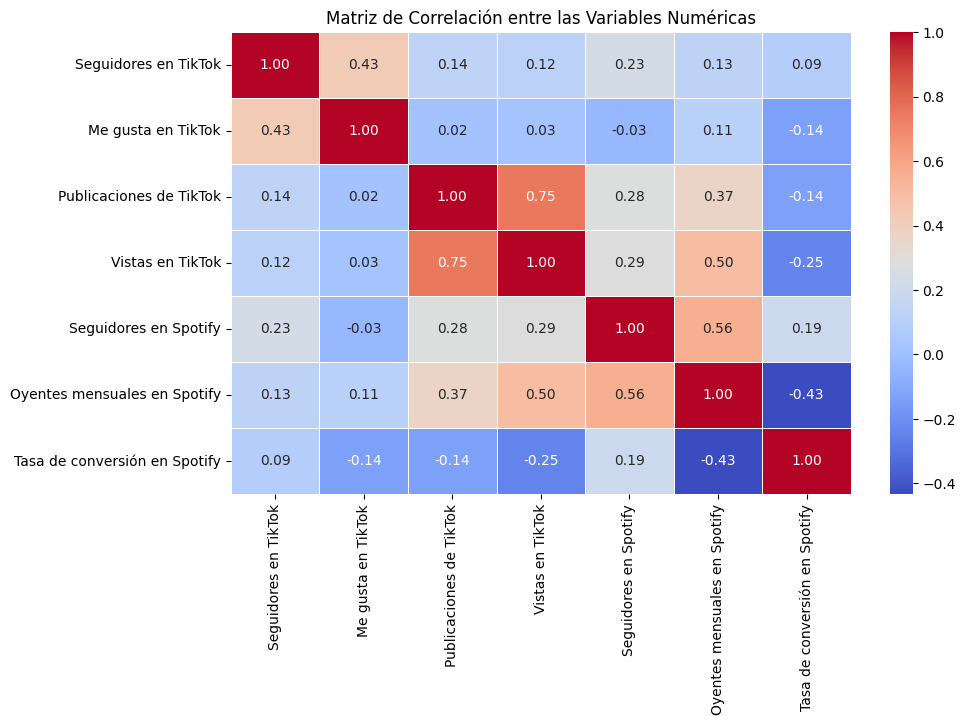

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



numerical_columns = ['Seguidores en TikTok', 'Me gusta en TikTok', 'Publicaciones de TikTok',
                     'Vistas en TikTok', 'Seguidores en Spotify', 'Oyentes mensuales en Spotify',
                     'Tasa de conversión en Spotify']


df_numeric = df[numerical_columns]


correlation_matrix = df_numeric.corr()


print("Matriz de Correlación:\n", correlation_matrix)


plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación entre las Variables Numéricas')
plt.show()


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np


df_remaining = pd.read_excel('/content/Artistas.xlsx')


predictor_columns = ['Seguidores en TikTok', 'Me gusta en TikTok', 'Publicaciones de TikTok',
                     'Vistas en TikTok', 'Seguidores en Spotify', 'Alcance de playlists en Spotify', 'Conteo de las playlists en Spotify']


y = df_remaining['Oyentes mensuales en Spotify']


X = df_remaining[predictor_columns]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()


model.fit(X_train, y_train)


y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)




r2_train = r2_score(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))


r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))


print(f"**Resultados en el Conjunto de Entrenamiento**")
print(f"R² (Train): {r2_train:.4f}")
print(f"MAE (Train): {mae_train:.4f}")
print(f"RMSE (Train): {rmse_train:.4f}")

print(f"\n**Resultados en el Conjunto de Prueba**")
print(f"R² (Test): {r2_test:.4f}")
print(f"MAE (Test): {mae_test:.4f}")
print(f"RMSE (Test): {rmse_test:.4f}")


**Resultados en el Conjunto de Entrenamiento**
R² (Train): 0.8095
MAE (Train): 2463604.8969
RMSE (Train): 3698456.3367

**Resultados en el Conjunto de Prueba**
R² (Test): 0.7928
MAE (Test): 3216696.7607
RMSE (Test): 5059726.6947


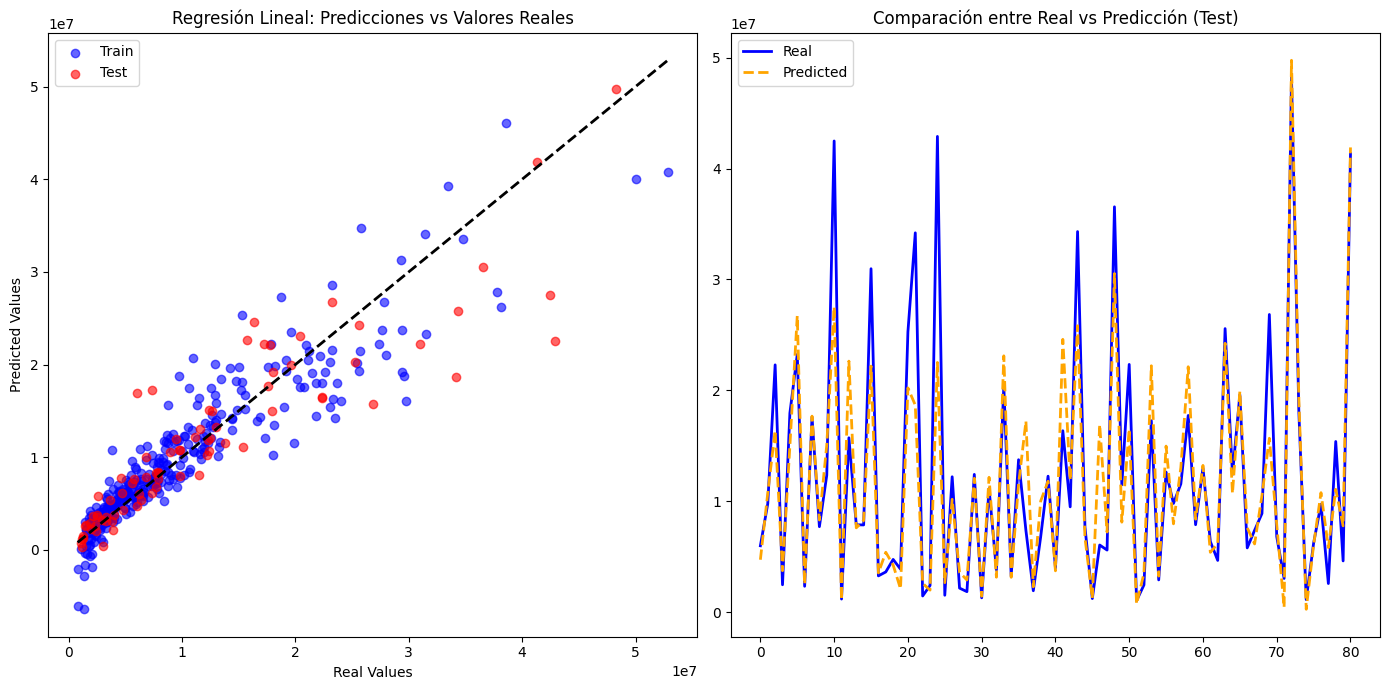

**Resultados en el Conjunto de Entrenamiento**
R² (Train): 0.8095
MAE (Train): 2463604.8969
RMSE (Train): 3698456.3367

**Resultados en el Conjunto de Prueba**
R² (Test): 0.7928
MAE (Test): 3216696.7607
RMSE (Test): 5059726.6947


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np


predictor_columns = ['Seguidores en TikTok', 'Me gusta en TikTok', 'Publicaciones de TikTok',
                     'Vistas en TikTok', 'Seguidores en Spotify',
                     'Tasa de conversión en Spotify', 'Alcance de playlists en Spotify', 'Conteo de las playlists en Spotify']


y = df_remaining['Oyentes mensuales en Spotify']


X = df_remaining[predictor_columns]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()


model.fit(X_train, y_train)


y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


plt.figure(figsize=(14, 7))


plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, color='blue', label='Train', alpha=0.6)
plt.scatter(y_test, y_test_pred, color='red', label='Test', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='black', linestyle='--', lw=2)
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Regresión Lineal: Predicciones vs Valores Reales')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(y_test.values, label='Real', color='blue', linewidth=2)
plt.plot(y_test_pred, label='Predicted', color='orange', linestyle='dashed', linewidth=2)
plt.title('Comparación entre Real vs Predicción (Test)')
plt.legend()


plt.tight_layout()
plt.show()


print(f"**Resultados en el Conjunto de Entrenamiento**")
print(f"R² (Train): {r2_train:.4f}")
print(f"MAE (Train): {mae_train:.4f}")
print(f"RMSE (Train): {rmse_train:.4f}")

print(f"\n**Resultados en el Conjunto de Prueba**")
print(f"R² (Test): {r2_test:.4f}")
print(f"MAE (Test): {mae_test:.4f}")
print(f"RMSE (Test): {rmse_test:.4f}")


In [ ]:
mean_y = y.mean()
mae_percentage = (mae_test / mean_y) * 100
rmse_percentage = (rmse_test / mean_y) * 100
print(f"MAE como porcentaje de la media: {mae_percentage:.2f}%")
print(f"RMSE como porcentaje de la media: {rmse_percentage:.2f}%")


MAE como porcentaje de la media: 31.40%
RMSE como porcentaje de la media: 49.39%


In [ ]:
baseline_predictions = [y.mean()] * len(y)
baseline_mae = mean_absolute_error(y, baseline_predictions)
baseline_rmse = np.sqrt(mean_squared_error(y, baseline_predictions))

print(f"MAE Baseline: {baseline_mae}")
print(f"RMSE Baseline: {baseline_rmse}")


MAE Baseline: 6799273.753879854
RMSE Baseline: 9121552.926404411


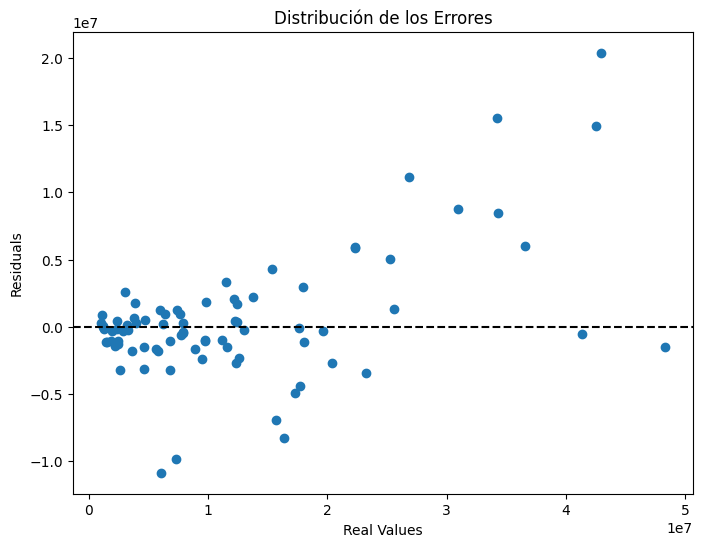

In [ ]:
residuals = y_test - y_test_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Real Values')
plt.ylabel('Residuals')
plt.title('Distribución de los Errores')
plt.show()


In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_train_pred_ridge = ridge_model.predict(X_train)
y_test_pred_ridge = ridge_model.predict(X_test)


print("Ridge Regression Metrics:")
print(f"R² (Train): {r2_score(y_train, y_train_pred_ridge):.4f}")
print(f"MAE (Train): {mean_absolute_error(y_train, y_train_pred_ridge):.4f}")
print(f"RMSE (Train): {np.sqrt(mean_squared_error(y_train, y_train_pred_ridge)):.4f}")
print(f"R² (Test): {r2_score(y_test, y_test_pred_ridge):.4f}")
print(f"MAE (Test): {mean_absolute_error(y_test, y_test_pred_ridge):.4f}")
print(f"RMSE (Test): {np.sqrt(mean_squared_error(y_test, y_test_pred_ridge)):.4f}")


lasso_model = Lasso(alpha=1000.0)
lasso_model.fit(X_train, y_train)
y_train_pred_lasso = lasso_model.predict(X_train)
y_test_pred_lasso = lasso_model.predict(X_test)


print("Lasso Regression Metrics:")
print(f"R² (Train): {r2_score(y_train, y_train_pred_lasso):.4f}")
print(f"MAE (Train): {mean_absolute_error(y_train, y_train_pred_lasso):.4f}")
print(f"RMSE (Train): {np.sqrt(mean_squared_error(y_train, y_train_pred_lasso)):.4f}")
print(f"R² (Test): {r2_score(y_test, y_test_pred_lasso):.4f}")
print(f"MAE (Test): {mean_absolute_error(y_test, y_test_pred_lasso):.4f}")
print(f"RMSE (Test): {np.sqrt(mean_squared_error(y_test, y_test_pred_lasso)):.4f}")


Ridge Regression Metrics:
R² (Train): 0.8489
MAE (Train): 2184944.4924
RMSE (Train): 3293776.4948
R² (Test): 0.8165
MAE (Test): 2849277.9365
RMSE (Test): 4762294.2088
Lasso Regression Metrics:
R² (Train): 0.8489
MAE (Train): 2190492.0456
RMSE (Train): 3293452.5180
R² (Test): 0.8167
MAE (Test): 2853095.3189
RMSE (Test): 4759377.6619


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=3.29852e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


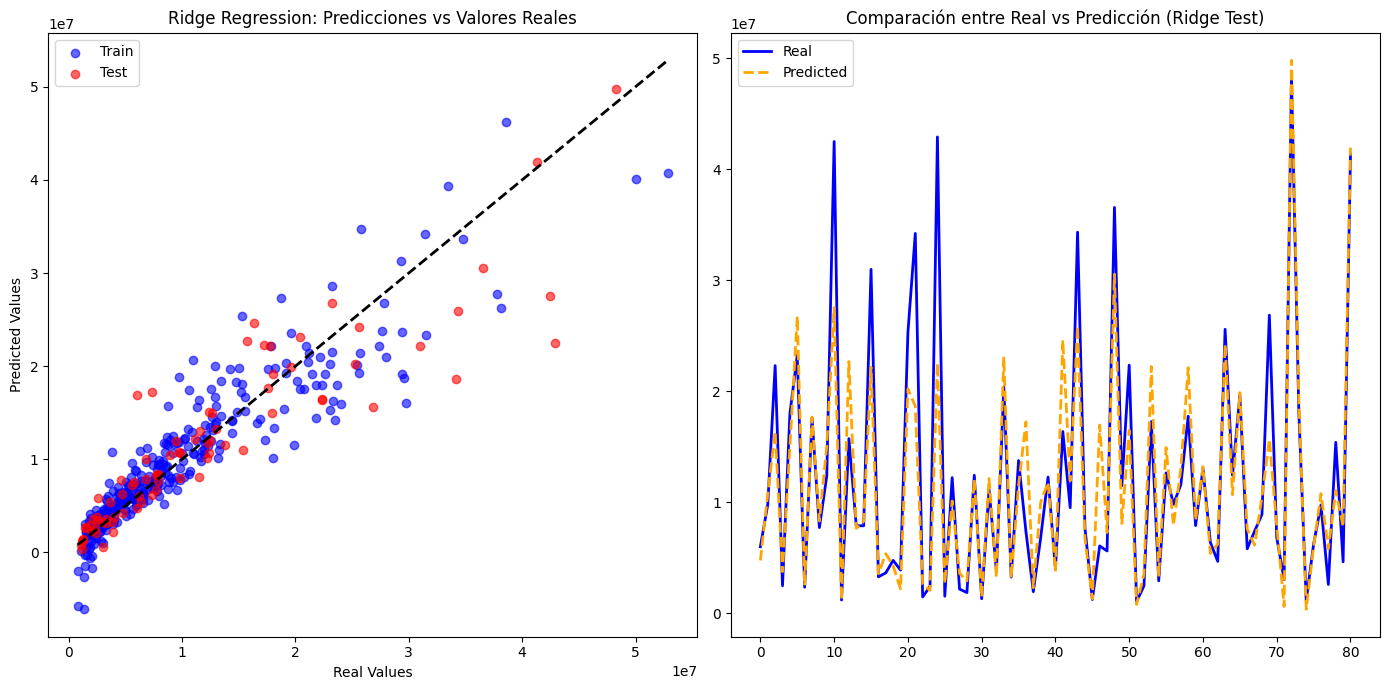

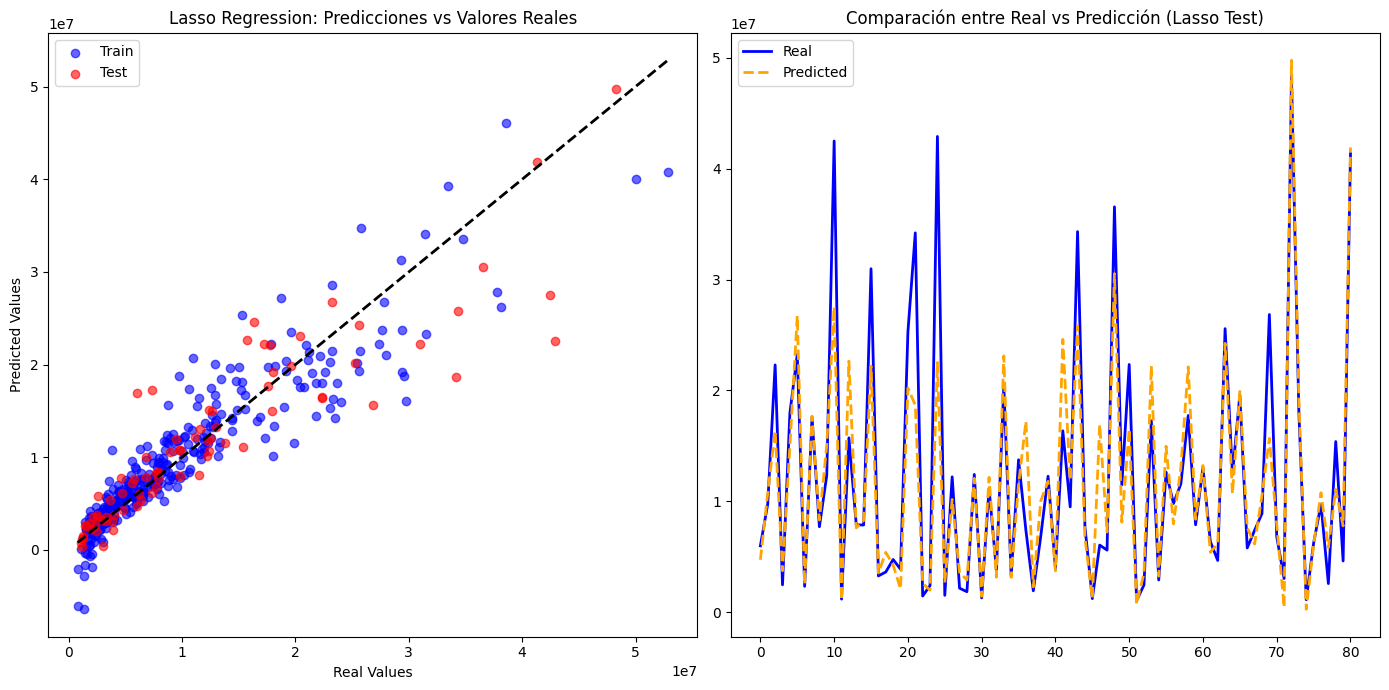

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


def plot_model_results(y_train, y_train_pred, y_test, y_test_pred, model_name):
    plt.figure(figsize=(14, 7))


    plt.subplot(1, 2, 1)
    plt.scatter(y_train, y_train_pred, color='blue', label='Train', alpha=0.6)
    plt.scatter(y_test, y_test_pred, color='red', label='Test', alpha=0.6)
    plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='black', linestyle='--', lw=2)
    plt.xlabel('Real Values')
    plt.ylabel('Predicted Values')
    plt.title(f'{model_name} Regression: Predicciones vs Valores Reales')
    plt.legend()


    plt.subplot(1, 2, 2)
    plt.plot(y_test.values, label='Real', color='blue', linewidth=2)
    plt.plot(y_test_pred, label='Predicted', color='orange', linestyle='dashed', linewidth=2)
    plt.title(f'Comparación entre Real vs Predicción ({model_name} Test)')
    plt.legend()


    plt.tight_layout()
    plt.show()


plot_model_results(y_train, y_train_pred_ridge, y_test, y_test_pred_ridge, 'Ridge')


plot_model_results(y_train, y_train_pred_lasso, y_test, y_test_pred_lasso, 'Lasso')


In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV


param_grid = {'alpha': [0.01, 0.1, 1, 10, 100, 1000]}


ridge = Ridge()
ridge_grid_search = GridSearchCV(ridge, param_grid, cv=5)
ridge_grid_search.fit(X_train, y_train)


print("Mejor alpha para Ridge:", ridge_grid_search.best_params_)


lasso = Lasso()
lasso_grid_search = GridSearchCV(lasso, param_grid, cv=5)
lasso_grid_search.fit(X_train, y_train)


print("Mejor alpha para Lasso:", lasso_grid_search.best_params_)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=3.13519e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=4.01488e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.80828e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=3.46797e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarnin

Mejor alpha para Ridge: {'alpha': 1}


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.798e+13, tolerance: 1.924e+12
  model = cd_fast.enet_coordinate_descent(


Mejor alpha para Lasso: {'alpha': 1000}


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)


r2_train_rf = r2_score(y_train, y_train_pred_rf)
r2_test_rf = r2_score(y_test, y_test_pred_rf)
mae_train_rf = mean_absolute_error(y_train, y_train_pred_rf)
mae_test_rf = mean_absolute_error(y_test, y_test_pred_rf)
rmse_train_rf = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
rmse_test_rf = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))


print("Random Forest Regression Metrics:")
print(f"R² (Train): {r2_train_rf:.4f}")
print(f"MAE (Train): {mae_train_rf:.4f}")
print(f"RMSE (Train): {rmse_train_rf:.4f}")
print(f"R² (Test): {r2_test_rf:.4f}")
print(f"MAE (Test): {mae_test_rf:.4f}")
print(f"RMSE (Test): {rmse_test_rf:.4f}")


Random Forest Regression Metrics:
R² (Train): 0.9770
MAE (Train): 746786.1333
RMSE (Train): 1284515.1516
R² (Test): 0.8707
MAE (Test): 2349878.8452
RMSE (Test): 3997850.2532


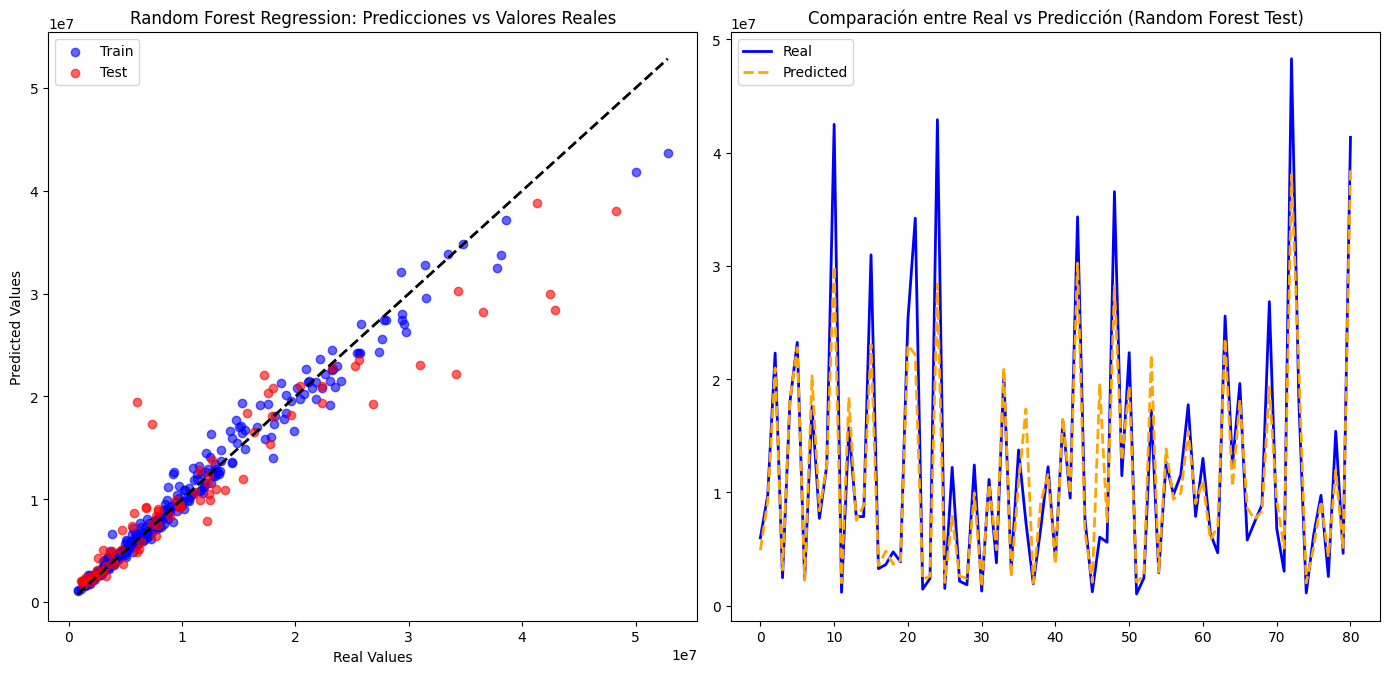

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


def plot_model_results_rf(y_train, y_train_pred, y_test, y_test_pred, model_name):
    plt.figure(figsize=(14, 7))


    plt.subplot(1, 2, 1)
    plt.scatter(y_train, y_train_pred, color='blue', label='Train', alpha=0.6)
    plt.scatter(y_test, y_test_pred, color='red', label='Test', alpha=0.6)
    plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='black', linestyle='--', lw=2)
    plt.xlabel('Real Values')
    plt.ylabel('Predicted Values')
    plt.title(f'{model_name} Regression: Predicciones vs Valores Reales')
    plt.legend()


    plt.subplot(1, 2, 2)
    plt.plot(y_test.values, label='Real', color='blue', linewidth=2)
    plt.plot(y_test_pred, label='Predicted', color='orange', linestyle='dashed', linewidth=2)
    plt.title(f'Comparación entre Real vs Predicción ({model_name} Test)')
    plt.legend()


    plt.tight_layout()
    plt.show()


plot_model_results_rf(y_train, y_train_pred_rf, y_test, y_test_pred_rf, 'Random Forest')


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)


y_train_pred_xgb = xgb_model.predict(X_train)
y_test_pred_xgb = xgb_model.predict(X_test)


r2_train_xgb = r2_score(y_train, y_train_pred_xgb)
r2_test_xgb = r2_score(y_test, y_test_pred_xgb)
mae_train_xgb = mean_absolute_error(y_train, y_train_pred_xgb)
mae_test_xgb = mean_absolute_error(y_test, y_test_pred_xgb)
rmse_train_xgb = np.sqrt(mean_squared_error(y_train, y_train_pred_xgb))
rmse_test_xgb = np.sqrt(mean_squared_error(y_test, y_test_pred_xgb))


print("XGBoost Regression Metrics:")
print(f"R² (Train): {r2_train_xgb:.4f}")
print(f"MAE (Train): {mae_train_xgb:.4f}")
print(f"RMSE (Train): {rmse_train_xgb:.4f}")
print(f"R² (Test): {r2_test_xgb:.4f}")
print(f"MAE (Test): {mae_test_xgb:.4f}")
print(f"RMSE (Test): {rmse_test_xgb:.4f}")


XGBoost Regression Metrics:
R² (Train): 1.0000
MAE (Train): 762.0582
RMSE (Train): 1104.2975
R² (Test): 0.8872
MAE (Test): 1952630.1250
RMSE (Test): 3734140.2245


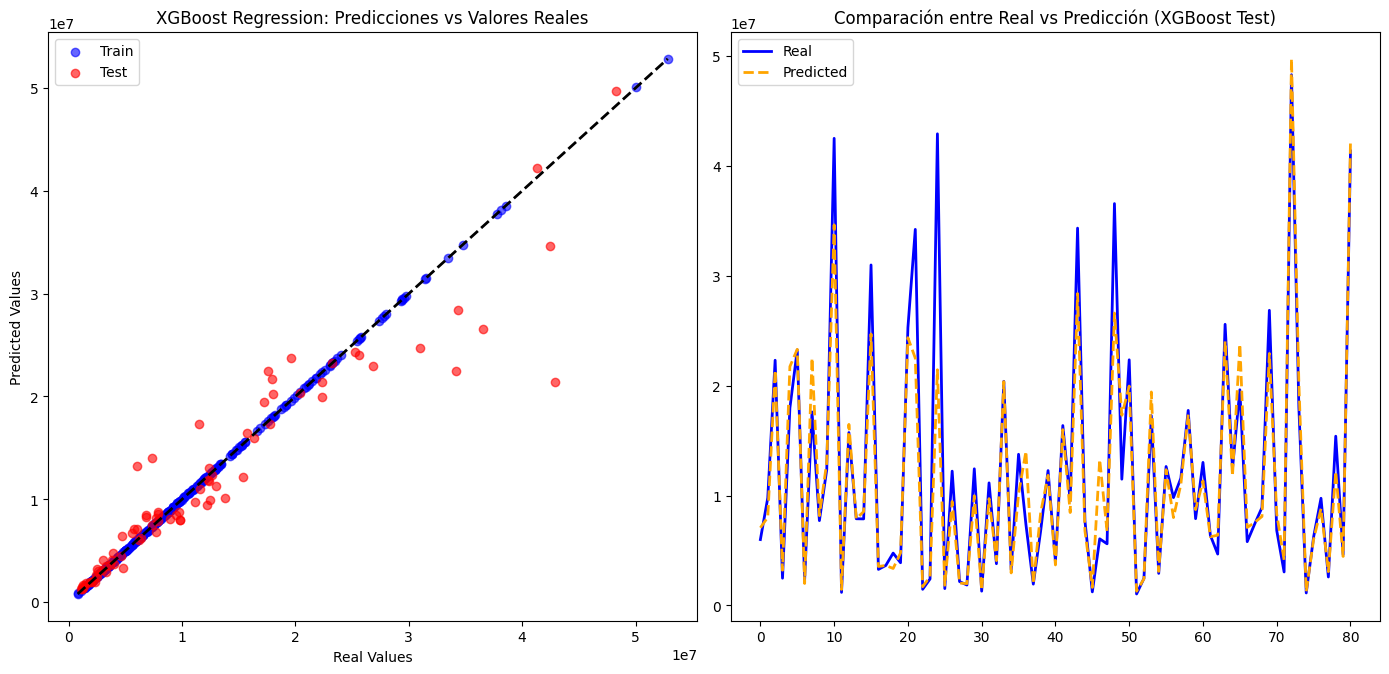

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


def plot_model_results_xgb(y_train, y_train_pred, y_test, y_test_pred, model_name):
    plt.figure(figsize=(14, 7))


    plt.subplot(1, 2, 1)
    plt.scatter(y_train, y_train_pred, color='blue', label='Train', alpha=0.6)
    plt.scatter(y_test, y_test_pred, color='red', label='Test', alpha=0.6)
    plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='black', linestyle='--', lw=2)
    plt.xlabel('Real Values')
    plt.ylabel('Predicted Values')
    plt.title(f'{model_name} Regression: Predicciones vs Valores Reales')
    plt.legend()


    plt.subplot(1, 2, 2)
    plt.plot(y_test.values, label='Real', color='blue', linewidth=2)
    plt.plot(y_test_pred, label='Predicted', color='orange', linestyle='dashed', linewidth=2)
    plt.title(f'Comparación entre Real vs Predicción ({model_name} Test)')
    plt.legend()


    plt.tight_layout()
    plt.show()


plot_model_results_xgb(y_train, y_train_pred_xgb, y_test, y_test_pred_xgb, 'XGBoost')


In [ ]:



r2_train_ridge = r2_score(y_train, y_train_pred_ridge)
r2_test_ridge = r2_score(y_test, y_test_pred_ridge)
mae_train_ridge = mean_absolute_error(y_train, y_train_pred_ridge)
mae_test_ridge = mean_absolute_error(y_test, y_test_pred_ridge)
rmse_train_ridge = np.sqrt(mean_squared_error(y_train, y_train_pred_ridge))
rmse_test_ridge = np.sqrt(mean_squared_error(y_test, y_test_pred_ridge))


r2_train_lasso = r2_score(y_train, y_train_pred_lasso)
r2_test_lasso = r2_score(y_test, y_test_pred_lasso)
mae_train_lasso = mean_absolute_error(y_train, y_train_pred_lasso)
mae_test_lasso = mean_absolute_error(y_test, y_test_pred_lasso)
rmse_train_lasso = np.sqrt(mean_squared_error(y_train, y_train_pred_lasso))
rmse_test_lasso = np.sqrt(mean_squared_error(y_test, y_test_pred_lasso))


r2_train_rf = r2_score(y_train, y_train_pred_rf)
r2_test_rf = r2_score(y_test, y_test_pred_rf)
mae_train_rf = mean_absolute_error(y_train, y_train_pred_rf)
mae_test_rf = mean_absolute_error(y_test, y_test_pred_rf)
rmse_train_rf = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
rmse_test_rf = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))


r2_train_xgb = r2_score(y_train, y_train_pred_xgb)
r2_test_xgb = r2_score(y_test, y_test_pred_xgb)
mae_train_xgb = mean_absolute_error(y_train, y_train_pred_xgb)
mae_test_xgb = mean_absolute_error(y_test, y_test_pred_xgb)
rmse_train_xgb = np.sqrt(mean_squared_error(y_train, y_train_pred_xgb))
rmse_test_xgb = np.sqrt(mean_squared_error(y_test, y_test_pred_xgb))


metrics_comparison = pd.DataFrame({
    'Model': ['Ridge', 'Lasso', 'Random Forest', 'XGBoost'],
    'R² (Train)': [r2_train_ridge, r2_train_lasso, r2_train_rf, r2_train_xgb],
    'R² (Test)': [r2_test_ridge, r2_test_lasso, r2_test_rf, r2_test_xgb],
    'MAE (Train)': [mae_train_ridge, mae_train_lasso, mae_train_rf, mae_train_xgb],
    'MAE (Test)': [mae_test_ridge, mae_test_lasso, mae_test_rf, mae_test_xgb],
    'RMSE (Train)': [rmse_train_ridge, rmse_train_lasso, rmse_train_rf, rmse_train_xgb],
    'RMSE (Test)': [rmse_test_ridge, rmse_test_lasso, rmse_test_rf, rmse_test_xgb]
})



metrics_comparison = pd.DataFrame({
    'Model': ['Ridge', 'Lasso', 'Random Forest', 'XGBoost'],
    'R² (Train)': [r2_train_ridge, r2_train_lasso, r2_train_rf, r2_train_xgb],
    'R² (Test)': [r2_test_ridge, r2_test_lasso, r2_test_rf, r2_test_xgb],
    'MAE (Train)': [mae_train_ridge, mae_train_lasso, mae_train_rf, mae_train_xgb],
    'MAE (Test)': [mae_test_ridge, mae_test_lasso, mae_test_rf, mae_test_xgb],
    'RMSE (Train)': [rmse_train_ridge, rmse_train_lasso, rmse_train_rf, rmse_train_xgb],
    'RMSE (Test)': [rmse_test_ridge, rmse_test_lasso, rmse_test_rf, rmse_test_xgb]
})


print(metrics_comparison)

           Model  R² (Train)  R² (Test)   MAE (Train)    MAE (Test)  \
0          Ridge    0.848910   0.816463  2.184944e+06  2.849278e+06   
1          Lasso    0.848940   0.816688  2.190492e+06  2.853095e+06   
2  Random Forest    0.977021   0.870657  7.467861e+05  2.349879e+06   
3        XGBoost    1.000000   0.887158  7.620582e+02  1.952630e+06   

   RMSE (Train)   RMSE (Test)  
0  3.293776e+06  4.762294e+06  
1  3.293453e+06  4.759378e+06  
2  1.284515e+06  3.997850e+06  
3  1.104298e+03  3.734140e+06  


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor


param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


rf_model = RandomForestRegressor(random_state=42)


grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)


best_rf_model = grid_search_rf.best_estimator_


y_train_pred_rf_optimized = best_rf_model.predict(X_train)
y_test_pred_rf_optimized = best_rf_model.predict(X_test)


r2_train_rf_optimized = r2_score(y_train, y_train_pred_rf_optimized)
r2_test_rf_optimized = r2_score(y_test, y_test_pred_rf_optimized)
mae_train_rf_optimized = mean_absolute_error(y_train, y_train_pred_rf_optimized)
mae_test_rf_optimized = mean_absolute_error(y_test, y_test_pred_rf_optimized)
rmse_train_rf_optimized = np.sqrt(mean_squared_error(y_train, y_train_pred_rf_optimized))
rmse_test_rf_optimized = np.sqrt(mean_squared_error(y_test, y_test_pred_rf_optimized))


print("Random Forest (Optimized) Regression Metrics:")
print(f"R² (Train): {r2_train_rf_optimized:.4f}")
print(f"MAE (Train): {mae_train_rf_optimized:.4f}")
print(f"RMSE (Train): {rmse_train_rf_optimized:.4f}")
print(f"R² (Test): {r2_test_rf_optimized:.4f}")
print(f"MAE (Test): {mae_test_rf_optimized:.4f}")
print(f"RMSE (Test): {rmse_test_rf_optimized:.4f}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Random Forest (Optimized) Regression Metrics:
R² (Train): 0.9793
MAE (Train): 731885.8808
RMSE (Train): 1217821.0935
R² (Test): 0.8683
MAE (Test): 2379429.9046
RMSE (Test): 4033773.1292


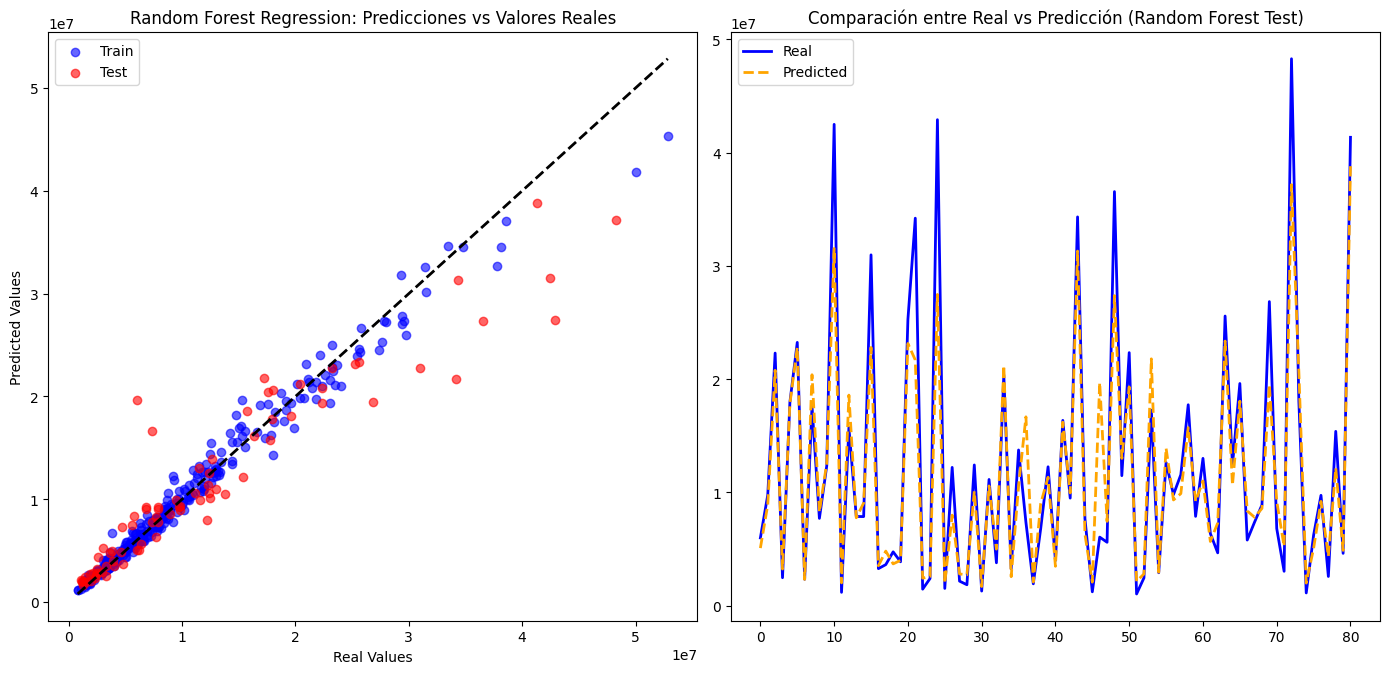

In [ ]:

def plot_model_results_optimized(y_train, y_train_pred, y_test, y_test_pred, model_name):
    plt.figure(figsize=(14, 7))


    plt.subplot(1, 2, 1)
    plt.scatter(y_train, y_train_pred, color='blue', label='Train', alpha=0.6)
    plt.scatter(y_test, y_test_pred, color='red', label='Test', alpha=0.6)
    plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='black', linestyle='--', lw=2)
    plt.xlabel('Real Values')
    plt.ylabel('Predicted Values')
    plt.title(f'{model_name} Regression: Predicciones vs Valores Reales')
    plt.legend()


    plt.subplot(1, 2, 2)
    plt.plot(y_test.values, label='Real', color='blue', linewidth=2)
    plt.plot(y_test_pred, label='Predicted', color='orange', linestyle='dashed', linewidth=2)
    plt.title(f'Comparación entre Real vs Predicción ({model_name} Test)')
    plt.legend()


    plt.tight_layout()
    plt.show()


plot_model_results_optimized(y_train, y_train_pred_rf_optimized, y_test, y_test_pred_rf_optimized, 'Random Forest')


In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}


xgb_model = xgb.XGBRegressor(random_state=42)


grid_search_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv=5, n_jobs=-1, verbose=2)
grid_search_xgb.fit(X_train, y_train)


best_xgb_model = grid_search_xgb.best_estimator_


y_train_pred_xgb_optimized = best_xgb_model.predict(X_train)
y_test_pred_xgb_optimized = best_xgb_model.predict(X_test)


r2_train_xgb_optimized = r2_score(y_train, y_train_pred_xgb_optimized)
r2_test_xgb_optimized = r2_score(y_test, y_test_pred_xgb_optimized)
mae_train_xgb_optimized = mean_absolute_error(y_train, y_train_pred_xgb_optimized)
mae_test_xgb_optimized = mean_absolute_error(y_test, y_test_pred_xgb_optimized)
rmse_train_xgb_optimized = np.sqrt(mean_squared_error(y_train, y_train_pred_xgb_optimized))
rmse_test_xgb_optimized = np.sqrt(mean_squared_error(y_test, y_test_pred_xgb_optimized))


print("XGBoost (Optimized) Regression Metrics:")
print(f"R² (Train): {r2_train_xgb_optimized:.4f}")
print(f"MAE (Train): {mae_train_xgb_optimized:.4f}")
print(f"RMSE (Train): {rmse_train_xgb_optimized:.4f}")
print(f"R² (Test): {r2_test_xgb_optimized:.4f}")
print(f"MAE (Test): {mae_test_xgb_optimized:.4f}")
print(f"RMSE (Test): {rmse_test_xgb_optimized:.4f}")


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
XGBoost (Optimized) Regression Metrics:
R² (Train): 1.0000
MAE (Train): 31889.1152
RMSE (Train): 41254.9754
R² (Test): 0.9229
MAE (Test): 1644462.8750
RMSE (Test): 3085872.8889


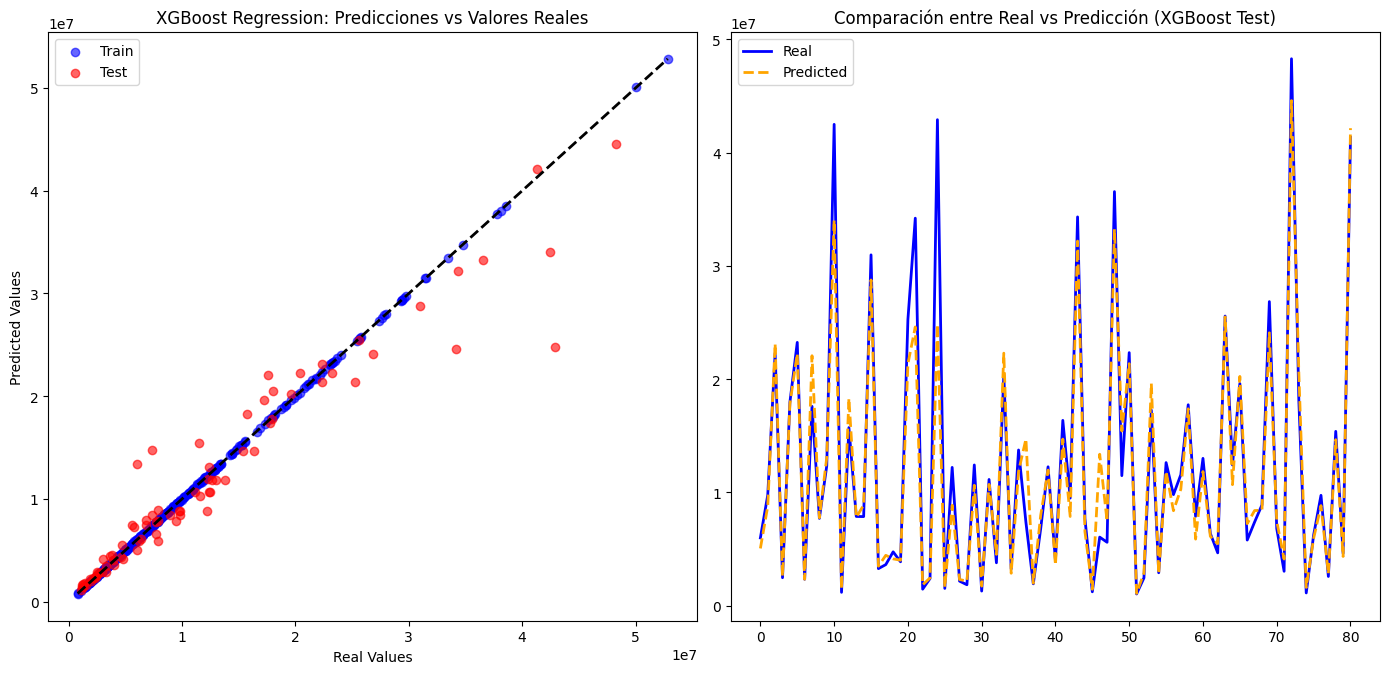

In [ ]:

def plot_model_results_optimized_xgb(y_train, y_train_pred, y_test, y_test_pred, model_name):
    plt.figure(figsize=(14, 7))


    plt.subplot(1, 2, 1)
    plt.scatter(y_train, y_train_pred, color='blue', label='Train', alpha=0.6)
    plt.scatter(y_test, y_test_pred, color='red', label='Test', alpha=0.6)
    plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='black', linestyle='--', lw=2)
    plt.xlabel('Real Values')
    plt.ylabel('Predicted Values')
    plt.title(f'{model_name} Regression: Predicciones vs Valores Reales')
    plt.legend()


    plt.subplot(1, 2, 2)
    plt.plot(y_test.values, label='Real', color='blue', linewidth=2)
    plt.plot(y_test_pred, label='Predicted', color='orange', linestyle='dashed', linewidth=2)
    plt.title(f'Comparación entre Real vs Predicción ({model_name} Test)')
    plt.legend()


    plt.tight_layout()
    plt.show()


plot_model_results_optimized_xgb(y_train, y_train_pred_xgb_optimized, y_test, y_test_pred_xgb_optimized, 'XGBoost')


In [ ]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, min_samples_split=3, min_samples_leaf=2, random_state=42)
rf_model.fit(X_train, y_train)


y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)


r2_train_rf = r2_score(y_train, y_train_pred_rf)
r2_test_rf = r2_score(y_test, y_test_pred_rf)
mae_train_rf = mean_absolute_error(y_train, y_train_pred_rf)
mae_test_rf = mean_absolute_error(y_test, y_test_pred_rf)
rmse_train_rf = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
rmse_test_rf = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))


print("Random Forest Regression Metrics:")
print(f"R² (Train): {r2_train_rf:.4f}")
print(f"MAE (Train): {mae_train_rf:.4f}")
print(f"RMSE (Train): {rmse_train_rf:.4f}")
print(f"R² (Test): {r2_test_rf:.4f}")
print(f"MAE (Test): {mae_test_rf:.4f}")
print(f"RMSE (Test): {rmse_test_rf:.4f}")

Random Forest Regression Metrics:
R² (Train): 0.9387
MAE (Train): 1390184.3083
RMSE (Train): 2098502.6242
R² (Test): 0.8445
MAE (Test): 2686691.5087
RMSE (Test): 4383382.4519


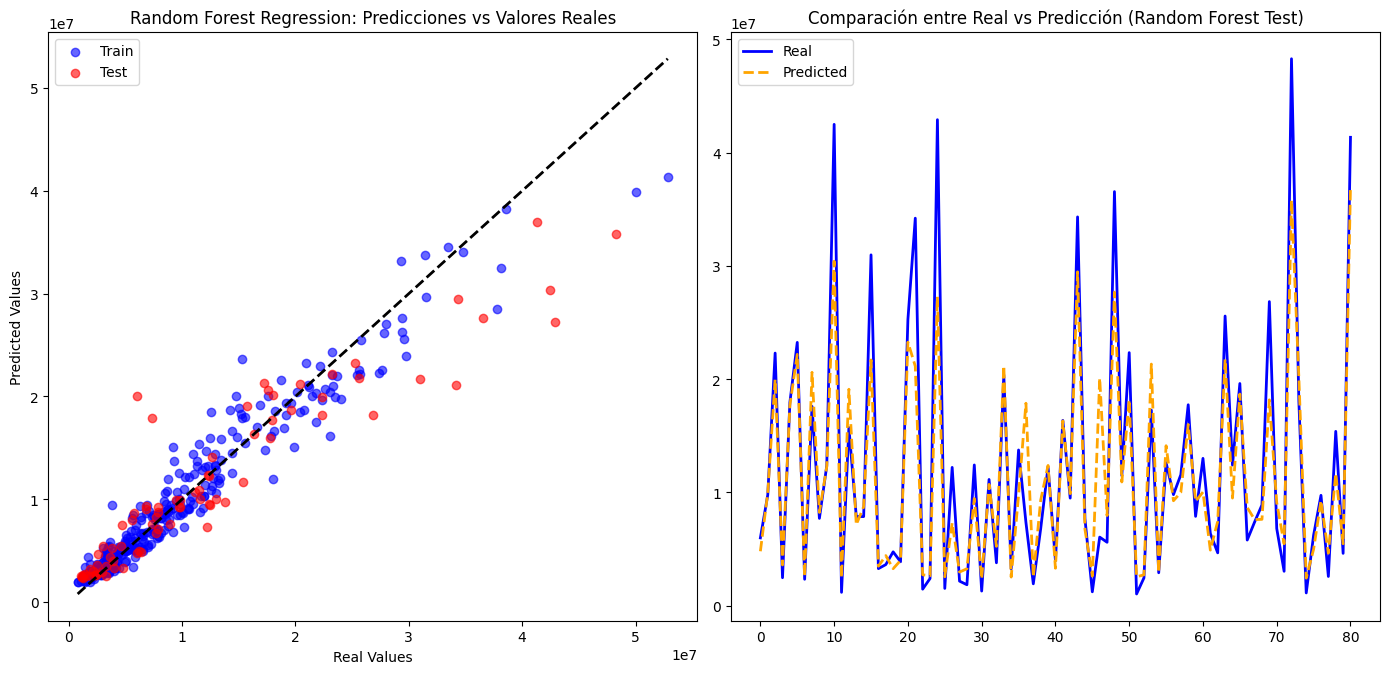

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


def plot_model_results_rf(y_train, y_train_pred, y_test, y_test_pred, model_name):
    plt.figure(figsize=(14, 7))


    plt.subplot(1, 2, 1)
    plt.scatter(y_train, y_train_pred, color='blue', label='Train', alpha=0.6)
    plt.scatter(y_test, y_test_pred, color='red', label='Test', alpha=0.6)
    plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='black', linestyle='--', lw=2)
    plt.xlabel('Real Values')
    plt.ylabel('Predicted Values')
    plt.title(f'{model_name} Regression: Predicciones vs Valores Reales')
    plt.legend()


    plt.subplot(1, 2, 2)
    plt.plot(y_test.values, label='Real', color='blue', linewidth=2)
    plt.plot(y_test_pred, label='Predicted', color='orange', linestyle='dashed', linewidth=2)
    plt.title(f'Comparación entre Real vs Predicción ({model_name} Test)')
    plt.legend()


    plt.tight_layout()
    plt.show()


plot_model_results_rf(y_train, y_train_pred_rf, y_test, y_test_pred_rf, 'Random Forest')

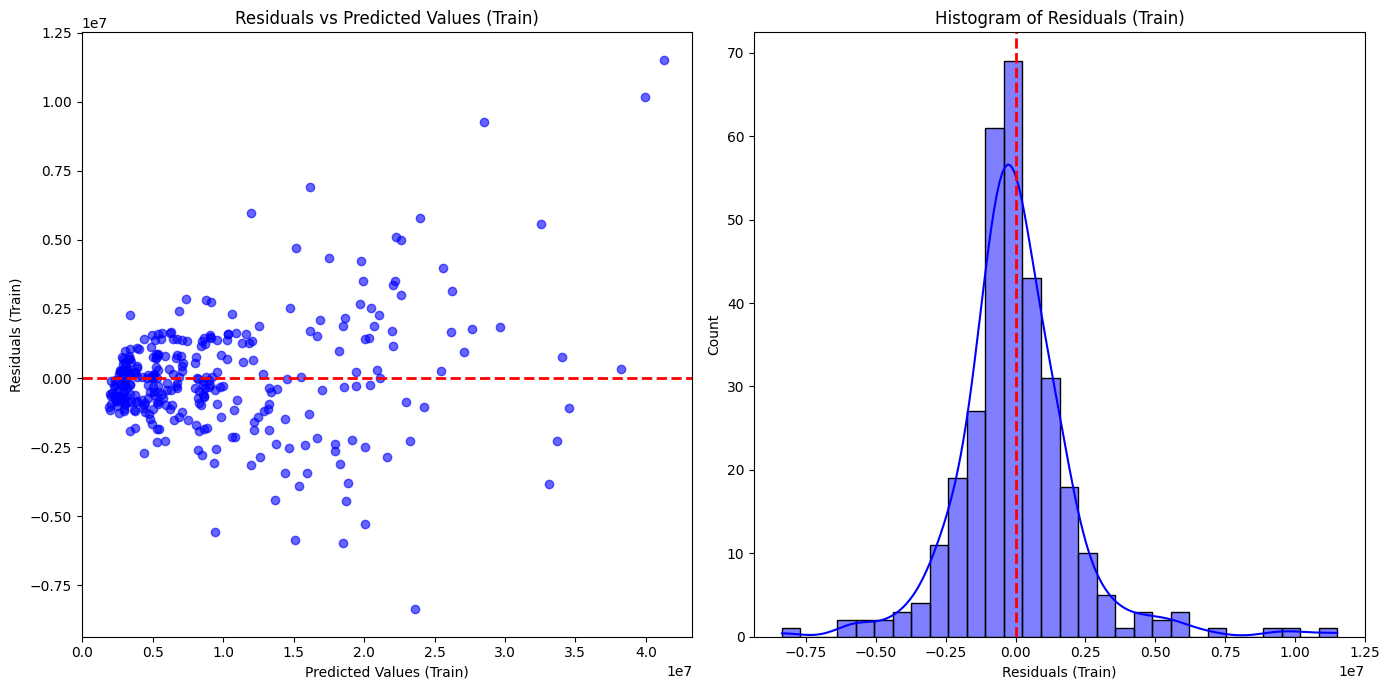

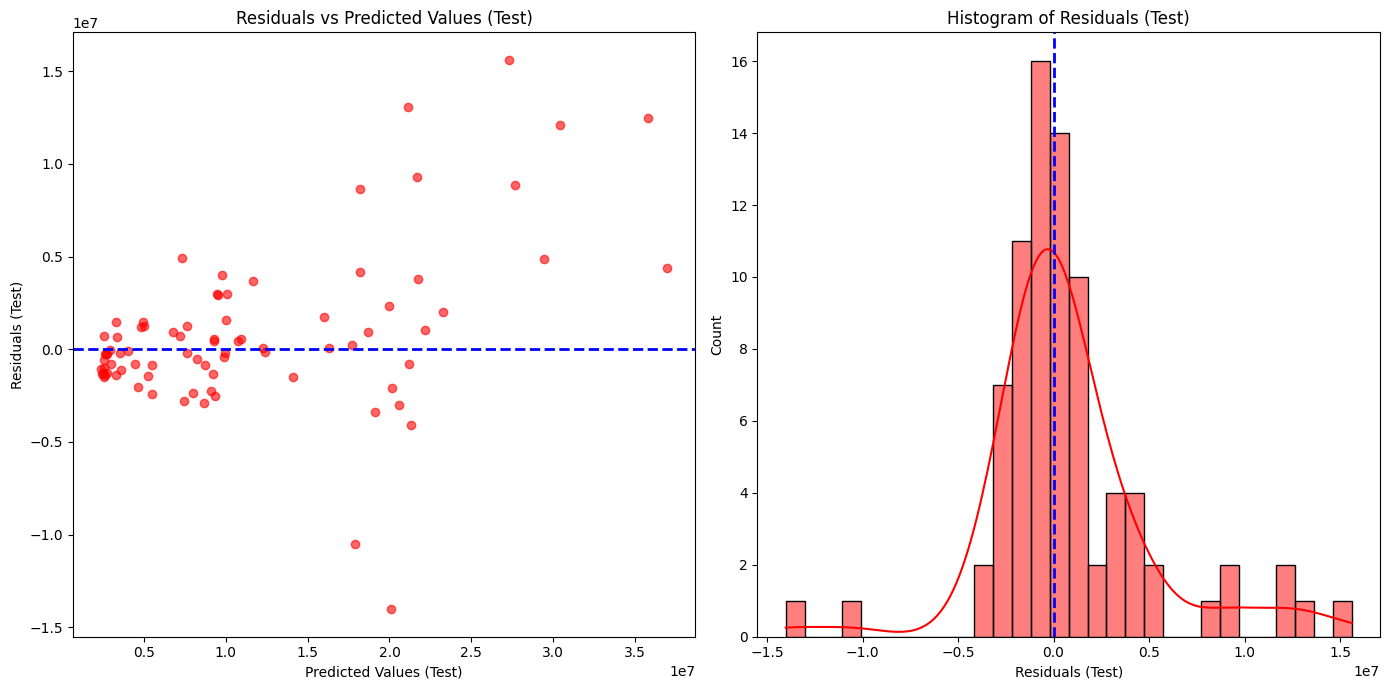

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


residuals_train_rf = y_train - y_train_pred_rf
residuals_test_rf = y_test - y_test_pred_rf


plt.figure(figsize=(14, 7))


plt.subplot(1, 2, 1)
plt.scatter(y_train_pred_rf, residuals_train_rf, color='blue', alpha=0.6)
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.xlabel('Predicted Values (Train)')
plt.ylabel('Residuals (Train)')
plt.title('Residuals vs Predicted Values (Train)')


plt.subplot(1, 2, 2)
sns.histplot(residuals_train_rf, kde=True, color='blue', bins=30)
plt.axvline(0, color='red', linestyle='--', lw=2)
plt.xlabel('Residuals (Train)')
plt.title('Histogram of Residuals (Train)')

plt.tight_layout()
plt.show()


plt.figure(figsize=(14, 7))


plt.subplot(1, 2, 1)
plt.scatter(y_test_pred_rf, residuals_test_rf, color='red', alpha=0.6)
plt.axhline(0, color='blue', linestyle='--', lw=2)
plt.xlabel('Predicted Values (Test)')
plt.ylabel('Residuals (Test)')
plt.title('Residuals vs Predicted Values (Test)')


plt.subplot(1, 2, 2)
sns.histplot(residuals_test_rf, kde=True, color='red', bins=30)
plt.axvline(0, color='blue', linestyle='--', lw=2)
plt.xlabel('Residuals (Test)')
plt.title('Histogram of Residuals (Test)')

plt.tight_layout()
plt.show()


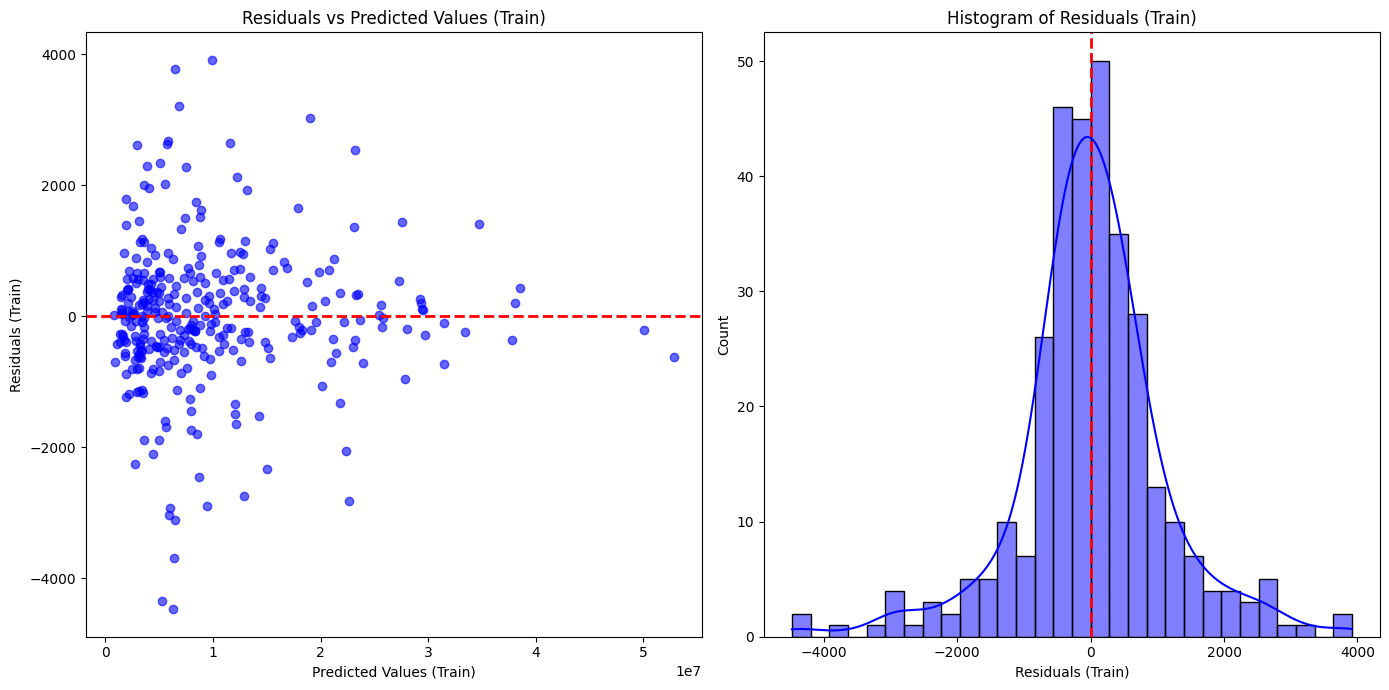

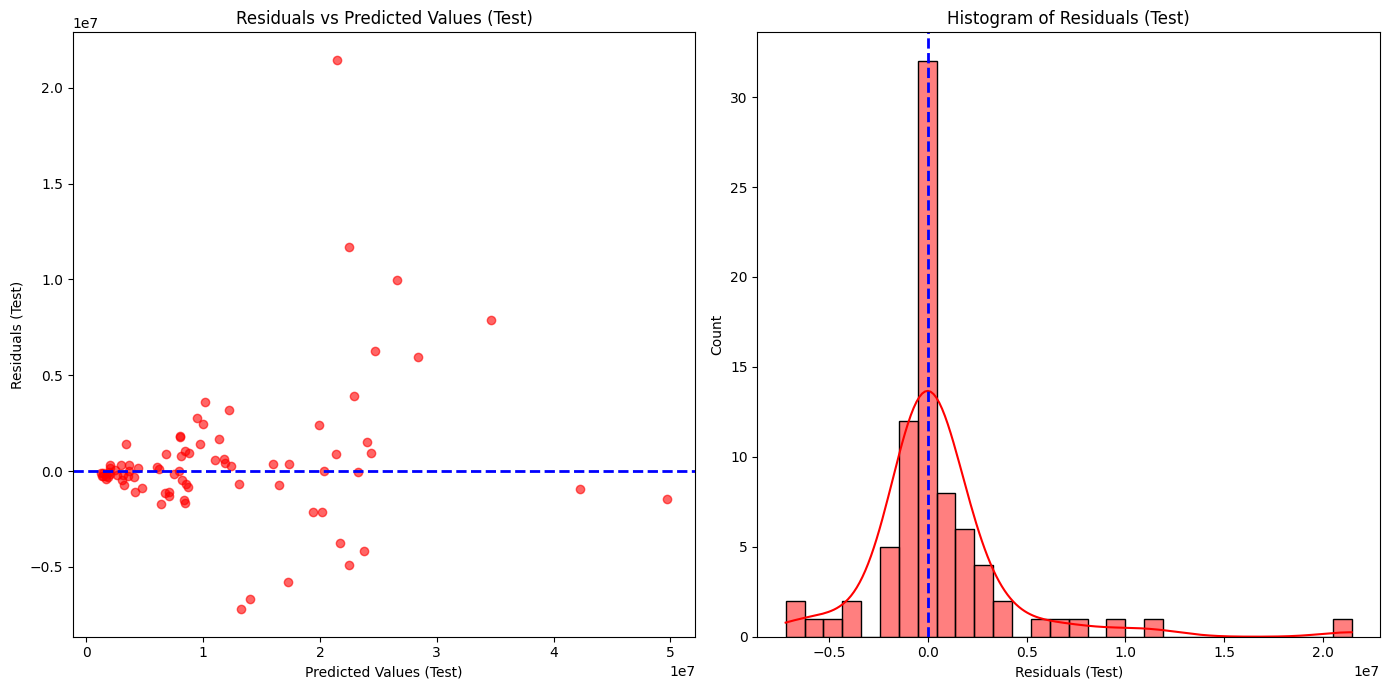

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)


y_train_pred_xgb = xgb_model.predict(X_train)
y_test_pred_xgb = xgb_model.predict(X_test)


residuals_train_xgb = y_train - y_train_pred_xgb
residuals_test_xgb = y_test - y_test_pred_xgb


plt.figure(figsize=(14, 7))


plt.subplot(1, 2, 1)
plt.scatter(y_train_pred_xgb, residuals_train_xgb, color='blue', alpha=0.6)
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.xlabel('Predicted Values (Train)')
plt.ylabel('Residuals (Train)')
plt.title('Residuals vs Predicted Values (Train)')


plt.subplot(1, 2, 2)
sns.histplot(residuals_train_xgb, kde=True, color='blue', bins=30)
plt.axvline(0, color='red', linestyle='--', lw=2)
plt.xlabel('Residuals (Train)')
plt.title('Histogram of Residuals (Train)')

plt.tight_layout()
plt.show()


plt.figure(figsize=(14, 7))


plt.subplot(1, 2, 1)
plt.scatter(y_test_pred_xgb, residuals_test_xgb, color='red', alpha=0.6)
plt.axhline(0, color='blue', linestyle='--', lw=2)
plt.xlabel('Predicted Values (Test)')
plt.ylabel('Residuals (Test)')
plt.title('Residuals vs Predicted Values (Test)')


plt.subplot(1, 2, 2)
sns.histplot(residuals_test_xgb, kde=True, color='red', bins=30)
plt.axvline(0, color='blue', linestyle='--', lw=2)
plt.xlabel('Residuals (Test)')
plt.title('Histogram of Residuals (Test)')

plt.tight_layout()
plt.show()


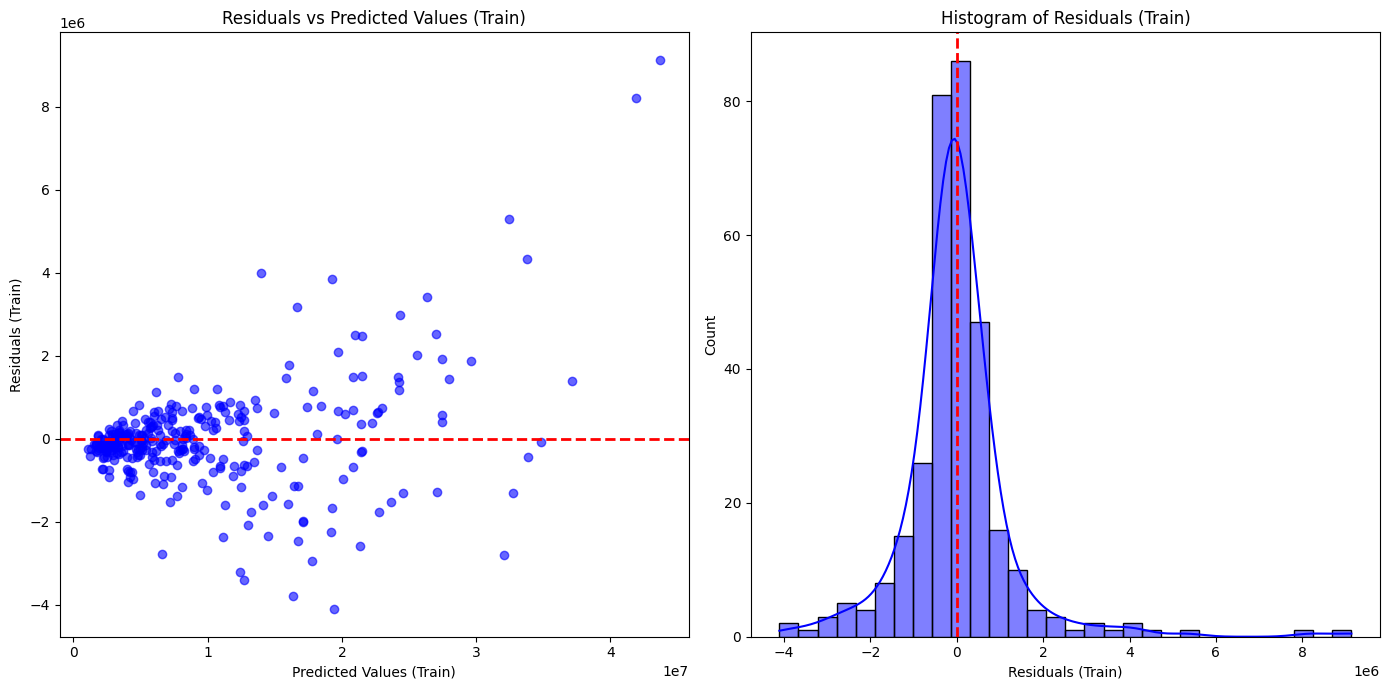

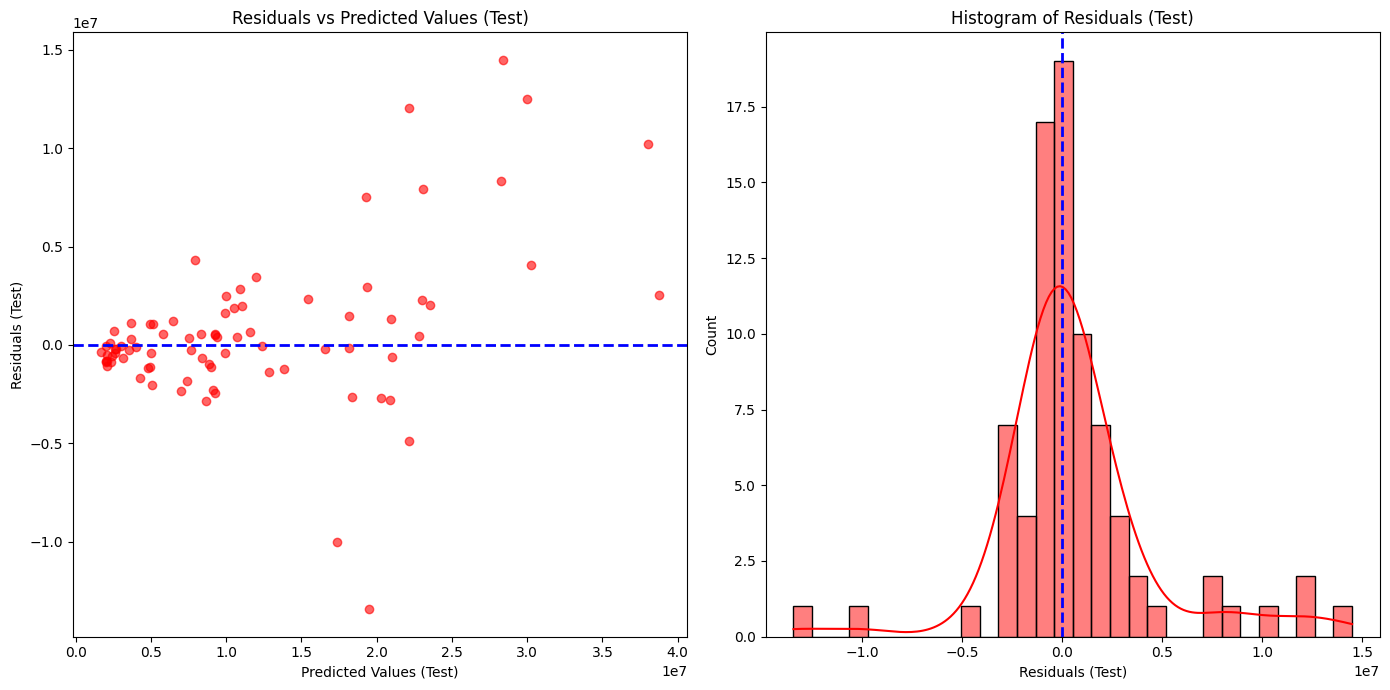

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)


y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)


residuals_train_rf = y_train - y_train_pred_rf
residuals_test_rf = y_test - y_test_pred_rf


plt.figure(figsize=(14, 7))


plt.subplot(1, 2, 1)
plt.scatter(y_train_pred_rf, residuals_train_rf, color='blue', alpha=0.6)
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.xlabel('Predicted Values (Train)')
plt.ylabel('Residuals (Train)')
plt.title('Residuals vs Predicted Values (Train)')


plt.subplot(1, 2, 2)
sns.histplot(residuals_train_rf, kde=True, color='blue', bins=30)
plt.axvline(0, color='red', linestyle='--', lw=2)
plt.xlabel('Residuals (Train)')
plt.title('Histogram of Residuals (Train)')

plt.tight_layout()
plt.show()


plt.figure(figsize=(14, 7))


plt.subplot(1, 2, 1)
plt.scatter(y_test_pred_rf, residuals_test_rf, color='red', alpha=0.6)
plt.axhline(0, color='blue', linestyle='--', lw=2)
plt.xlabel('Predicted Values (Test)')
plt.ylabel('Residuals (Test)')
plt.title('Residuals vs Predicted Values (Test)')


plt.subplot(1, 2, 2)
sns.histplot(residuals_test_rf, kde=True, color='red', bins=30)
plt.axvline(0, color='blue', linestyle='--', lw=2)
plt.xlabel('Residuals (Test)')
plt.title('Histogram of Residuals (Test)')

plt.tight_layout()
plt.show()
